**Customer Preference Analysis** 
1. **Identifying the most popular cuisines** based on the number of customer votes.
2. **Analyzing if certain cuisines tend to receive higher ratings**.
3. **Exploring the relationship** between the type of cuisine and the restaurant's ratings.

This analysis will be comprehensive and will involve multiple steps to explore different facets of customer preferences, including grouping, aggregating, visualizing, and drawing insights.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
file_path = r'C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Cognifyz-Data-Mastery-Program\DATASETS\Dataset .csv'
DATASET = pd.read_csv(file_path)

### Data Preparation

Before we  begin the analysis, make sure the dataset is clean, especially the columns that are of interest: **Cuisines**, **Votes**, and **Aggregate rating**.

- Check for missing values and handle them accordingly. If any rows have missing **Votes** or **Ratings**, either drop them or fill them based on understanding of the data.
- Ensure that **Votes** is a numeric value (integer or float) and **Aggregate rating** is also numeric.

In [3]:
# Checking for missing values in the columns we are interested in
print(DATASET[['Cuisines', 'Votes', 'Aggregate rating']].isnull().sum())

Cuisines            9
Votes               0
Aggregate rating    0
dtype: int64


In [4]:
# Filling missing values or dropping them
DATASET = DATASET.dropna(subset=['Cuisines', 'Votes', 'Aggregate rating'])

In [5]:
# Ensuring Votes and Aggregate rating are numeric
DATASET['Votes'] = pd.to_numeric(DATASET['Votes'], errors='coerce')
DATASET['Aggregate rating'] = pd.to_numeric(DATASET['Aggregate rating'], errors='coerce')

In [6]:
# Remove rows with NaN in 'Votes' or 'Aggregate rating'
DATASET = DATASET.dropna(subset=['Votes', 'Aggregate rating'])

### Understanding the Dataset

To understand customer preferences better, let's first take a look at the basic summary statistics of the data, especially focusing on **Cuisines**, **Votes**, and **Ratings**.

In [7]:
# Checking the basic statistics and distribution of the Votes and Ratings
print(DATASET[['Votes', 'Aggregate rating']].describe())

# Previewing the first few rows of the dataset to understand its structure
print(DATASET[['Cuisines', 'Votes', 'Aggregate rating']].head())

              Votes  Aggregate rating
count   9542.000000       9542.000000
mean     156.772060          2.665238
std      430.203324          1.516588
min        0.000000          0.000000
25%        5.000000          2.500000
50%       31.000000          3.200000
75%      130.000000          3.700000
max    10934.000000          4.900000
                           Cuisines  Votes  Aggregate rating
0        French, Japanese, Desserts    314               4.8
1                          Japanese    591               4.5
2  Seafood, Asian, Filipino, Indian    270               4.4
3                   Japanese, Sushi    365               4.9
4                  Japanese, Korean    229               4.8


### Identifying the Most Popular Cuisines Based on Votes

### Grouping Data by Cuisine

We’ll begin by grouping the dataset based on the **Cuisines** column and calculating the total **Votes** for each cuisine. This will help us identify which cuisines are the most popular among customers.

In [8]:
# Grouping the dataset by Cuisines and summing up the Votes
cuisine_votes = DATASET.groupby('Cuisines')['Votes'].sum().reset_index()

In [9]:
# Sorting the cuisines by total votes in descending order
cuisine_votes_sorted = cuisine_votes.sort_values(by='Votes', ascending=False)

In [10]:
# Displaying the top 10 most popular cuisines based on votes
top_cuisines = cuisine_votes_sorted.head(10)
print(top_cuisines)

                            Cuisines  Votes
1514           North Indian, Mughlai  53747
1306                    North Indian  46241
1329           North Indian, Chinese  42012
331                             Cafe  30657
497                          Chinese  21925
1520  North Indian, Mughlai, Chinese  20115
828                        Fast Food  17852
1699                    South Indian  16433
1288           Mughlai, North Indian  15275
1031                         Italian  14799


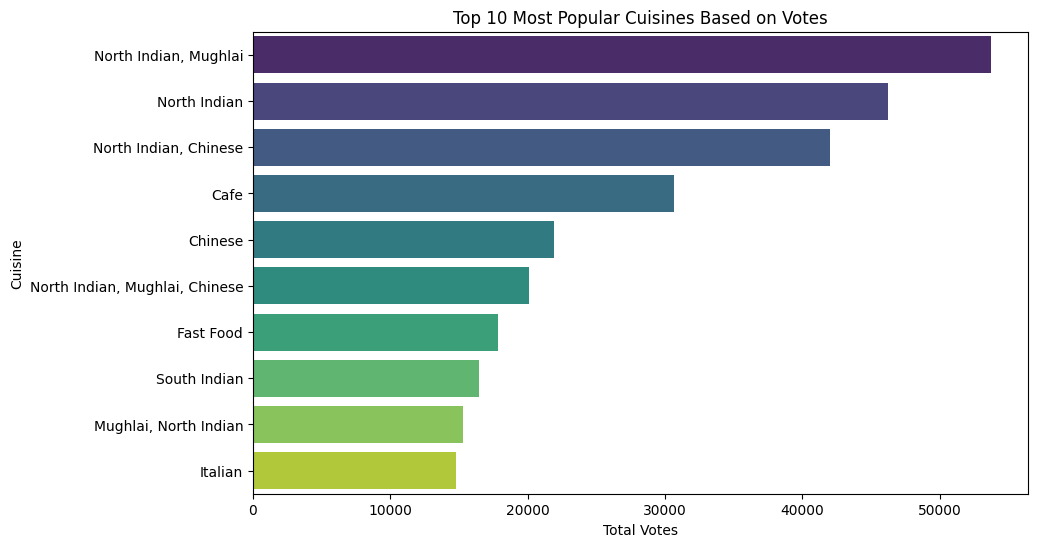

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Votes', y='Cuisines', data=top_cuisines, palette='viridis')
plt.title('Top 10 Most Popular Cuisines Based on Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.show()

This chart  will give us  a visual representation of the most popular cuisines,  understand customer preferences based on the quantity of votes.

### Analyzing Ratings for Different Cuisines

### Grouping Data by Cuisine for Average Rating

Next, let’s explore how the **Average rating** varies by cuisine. Group the dataset by **Cuisines** and calculate the mean **Aggregate rating** for each cuisine.

In [12]:
# Grouping by Cuisines and calculating the mean of Aggregate rating
cuisine_ratings = DATASET.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

In [13]:
# Sorting cuisines based on average ratings in descending order
cuisine_ratings_sorted = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

In [14]:
# Displaying the top 10 cuisines with the highest average ratings
top_rated_cuisines = cuisine_ratings_sorted.head(10)
print(top_rated_cuisines)

                      Cuisines  Aggregate rating
1062             Italian, Deli               4.9
949          Hawaiian, Seafood               4.9
93     American, Sandwich, Tea               4.9
683        Continental, Indian               4.9
796    European, Asian, Indian               4.9
803     European, Contemporary               4.9
808           European, German               4.9
169   BBQ, Breakfast, Southern               4.9
41    American, Coffee and Tea               4.9
1779         Sunda, Indonesian               4.9


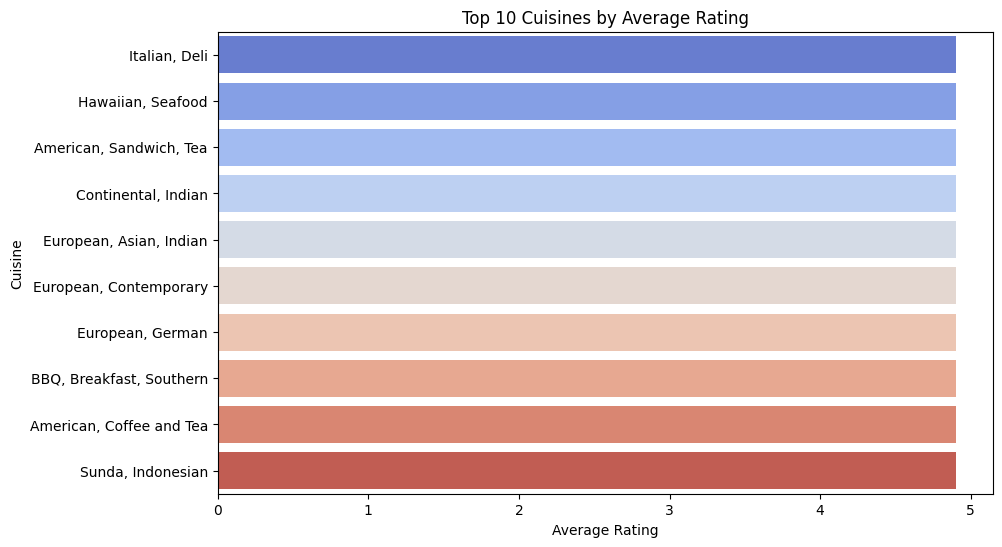

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Aggregate rating', y='Cuisines', data=top_rated_cuisines, palette='coolwarm')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

This bar chart will give us a clear view of which cuisines tend to receive higher ratings.

### Relationship Between Votes and Ratings

### Analyzing the Relationship Between **Votes** and **Ratings**

Now let’s check if there is any correlation between the number of votes a cuisine receives and its average rating. To do this, we can plot a **scatter plot** to show the relationship between the total **Votes** and the **Average Rating** for each cuisine.

In [16]:
# Merging votes and ratings data for a comprehensive view
cuisine_summary = pd.merge(cuisine_votes_sorted, cuisine_ratings_sorted, on='Cuisines')

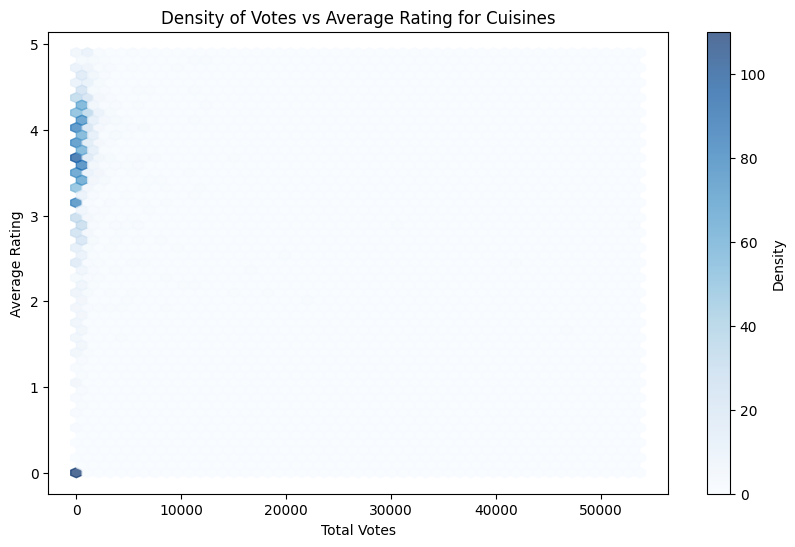

In [17]:
# Using a hexbin plot to visualize density
plt.figure(figsize=(10, 6))
plt.hexbin(cuisine_summary['Votes'], cuisine_summary['Aggregate rating'], gridsize=50, cmap='Blues', alpha=0.7)
plt.colorbar(label='Density')
plt.title('Density of Votes vs Average Rating for Cuisines')
plt.xlabel('Total Votes')
plt.ylabel('Average Rating')
plt.show()

### Analyzing Cuisines with Both High Votes and High Ratings

### Filtering Cuisines with High Votes and High Ratings

Next, let's identify if there are any cuisines that not only have a large number of votes but also high ratings. To do this, we’ll select the top **high-vote, high-rating cuisines**.

In [18]:
# Setting thresholds for high votes and high ratings
high_vote_threshold = cuisine_votes_sorted['Votes'].quantile(0.75)  # 75th percentile of votes
high_rating_threshold = cuisine_ratings_sorted['Aggregate rating'].quantile(0.75)  # 75th percentile of ratings

In [19]:
print(high_vote_threshold)
print(high_vote_threshold)

694.0
694.0


In [20]:
# Filtering cuisines that are above the 75th percentile in both votes and ratings
high_performance_cuisines = cuisine_summary[
    (cuisine_summary['Votes'] > high_vote_threshold) &
    (cuisine_summary['Aggregate rating'] > high_rating_threshold)
]

print(high_performance_cuisines[['Cuisines', 'Votes', 'Aggregate rating']])

                                       Cuisines  Votes  Aggregate rating
10        European, Mediterranean, North Indian  12541          4.800000
11                                Modern Indian  12355          4.345455
14   Continental, American, Asian, North Indian  11404          4.150000
15                     Italian, American, Pizza  10934          4.800000
16         Italian, Continental, European, Cafe  10853          4.475000
..                                          ...    ...               ...
447                       Steak, Seafood, Grill    704          4.400000
449        Fast Food, Street Food, South Indian    697          4.400000
452                              Cafe, American    696          4.600000
453                                       Tapas    696          4.400000
454                          American, Hawaiian    695          4.500000

[168 rows x 3 columns]


> ###  Cuisine Popularity Based on Votes
First, let's analyze the most popular cuisines based on the number of votes. This will give us an idea of which cuisines are most frequently voted for by customers.

In [21]:
# Sorting the cuisines by the number of votes to find the most popular cuisines
cuisine_votes_sorted = cuisine_summary.sort_values(by='Votes', ascending=False)

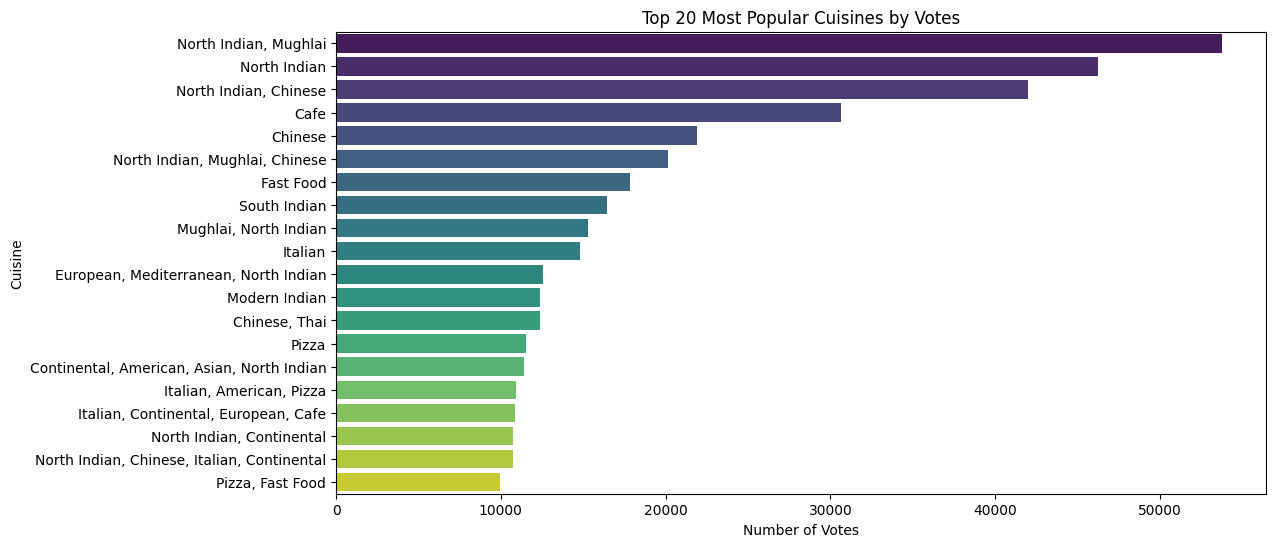

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Votes', y='Cuisines', data=cuisine_votes_sorted.head(20), palette='viridis')
plt.title('Top 20 Most Popular Cuisines by Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Cuisine')
plt.show()

This bar plot will help you identify the cuisines that have garnered the most votes. You can filter the top 20 or more depending on the dataset size.

#### let’s analyze if there are any cuisines that consistently receive higher ratings than others. This can reveal customer satisfaction trends.

In [23]:
# Sorting cuisines by average rating to identify the highest-rated cuisines
cuisine_rating_sorted = cuisine_summary.sort_values(by='Aggregate rating', ascending=False)

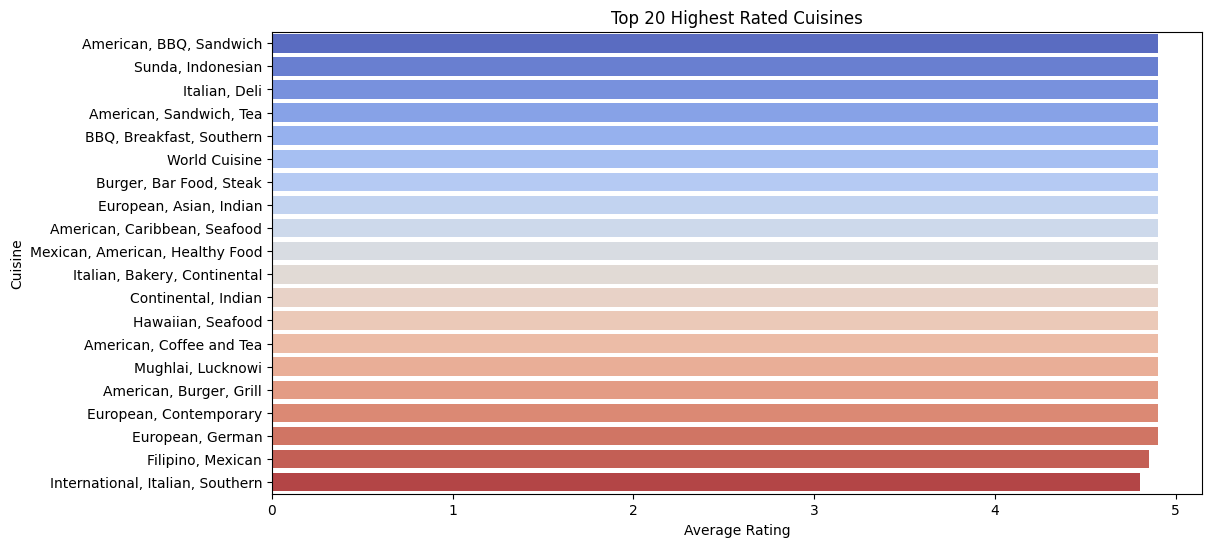

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_rating_sorted.head(20), palette='coolwarm')
plt.title('Top 20 Highest Rated Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

This will allow to spot which cuisines have the highest average ratings. Combining this with the popularity data will give a clearer picture of what people enjoy most.

> Let’s see if there’s any correlation between the number of votes and the ratings. Sometimes, cuisines with a large number of votes may have lower ratings due to more diverse feedback, while others with fewer votes might have higher ratings due to fewer but more favorable reviews.

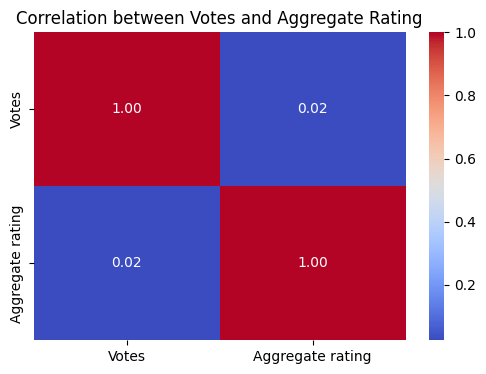

In [25]:
# Correlation analysis between Votes and Aggregate Rating
correlation = cuisine_summary[['Votes', 'Aggregate rating']].corr()

# Display the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Votes and Aggregate Rating')
plt.show()

This heatmap will show the strength and direction of the relationship between votes and ratings. A positive correlation suggests that more popular cuisines tend to have better ratings, while a negative correlation indicates the opposite.

#### It’s useful to spot outliers where a cuisine might have a large number of votes but a low rating. This could indicate a mismatch in customer expectations or a need for improvement.

In [26]:
# Identifying potential outliers (high votes and low ratings)
outliers = cuisine_summary[(cuisine_summary['Votes'] > cuisine_summary['Votes'].quantile(0.9)) &
                           (cuisine_summary['Aggregate rating'] < cuisine_summary['Aggregate rating'].quantile(0.3))]

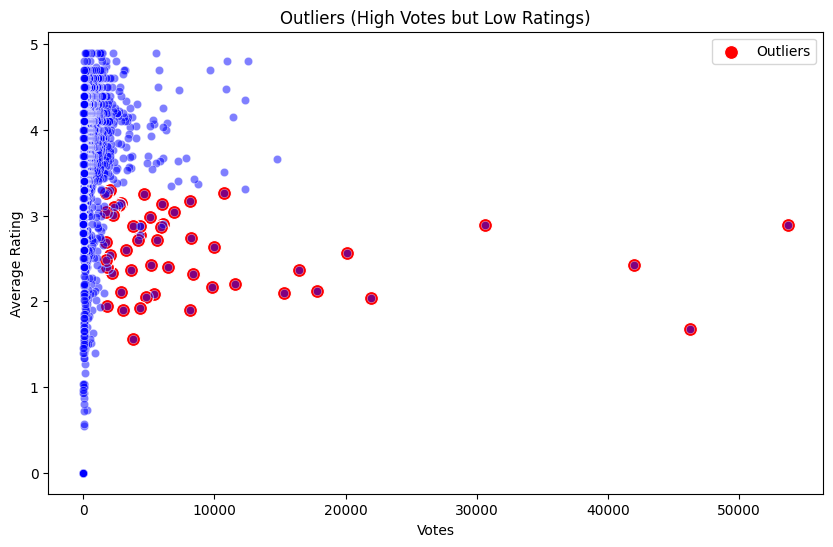

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=outliers, color='red', s=100, label='Outliers')
sns.scatterplot(x='Votes', y='Aggregate rating', data=cuisine_summary, color='blue', alpha=0.5)
plt.title('Outliers (High Votes but Low Ratings)')
plt.xlabel('Votes')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

This scatter plot will help  spot any high-vote cuisines that may not be living up to expectations.

`####  Finding cuisines with both high votes and high ratings`

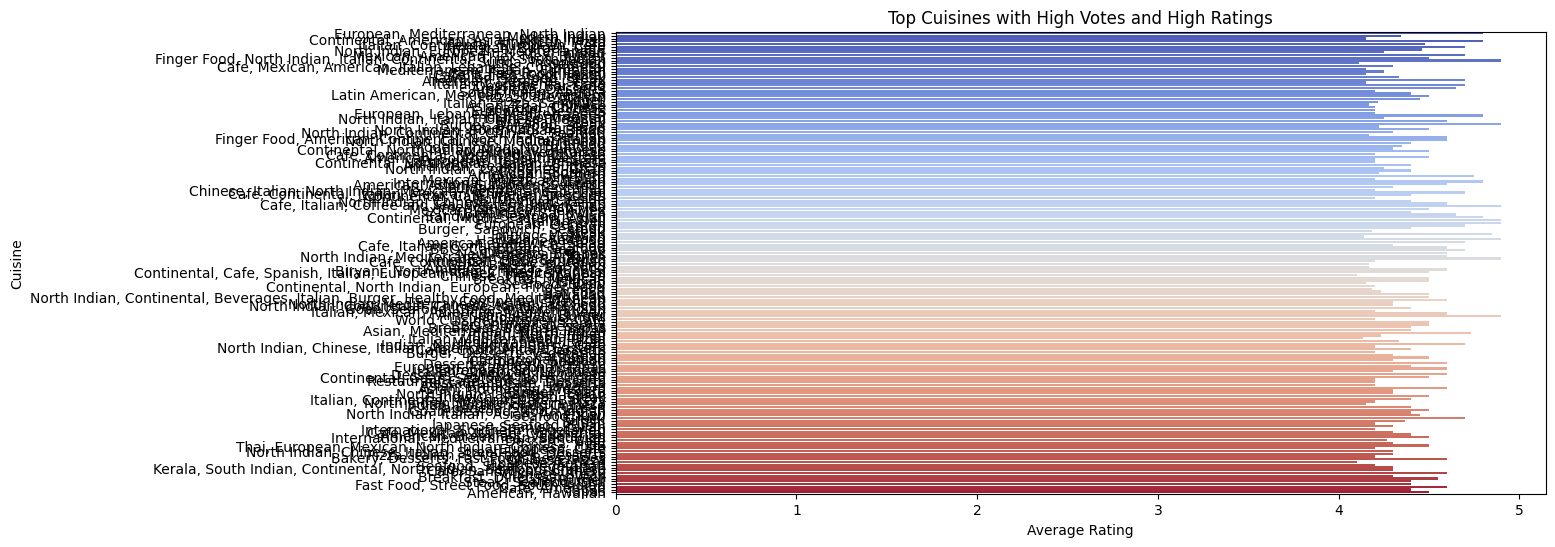

In [ ]:
high_votes_high_ratings = cuisine_summary[(cuisine_summary['Votes'] > cuisine_summary['Votes'].quantile(0.75)) &
                                          (cuisine_summary['Aggregate rating'] > cuisine_summary['Aggregate rating'].quantile(0.75))]

# Plotting top cuisines with high votes and high ratings
plt.figure(figsize=(12, 6))
sns.barplot(x='Aggregate rating', y='Cuisines', data=high_votes_high_ratings, palette='coolwarm')
plt.title('Top Cuisines with High Votes and High Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()